# Assignment 1

## 1. Theory

#### 1.

###### a)

In [5]:
import numpy as np

In [15]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1  1  1  1  1  1  1  1  1  1]
 [-2 -5 -3  0 -8 -2  1  5 -1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [19]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [22]:
from sympy import symbols, diff

In [25]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2
diff(f,x1)

2*x1 + 2*x2 - 4

##### b)

In [2]:
import matplotlib as plt

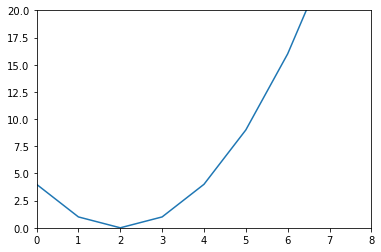

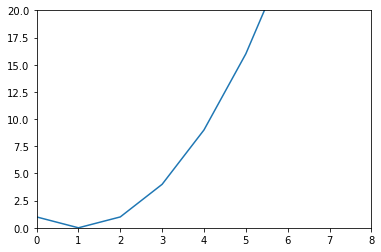

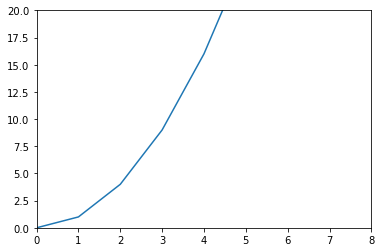

In [34]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,8)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

In [ ]:
x1 + x2 - 2 = 0
x1 + x2 = 2
# This condition has to be true, so any value that satisfies
# this condition would minimise J

## 2. Closed Form Linear Regression

In [9]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [10]:
#1 Reads in the data, ignoring the first row (header) and first column (index)
df = pd.read_csv('x06Simple.csv')
del df['Index']

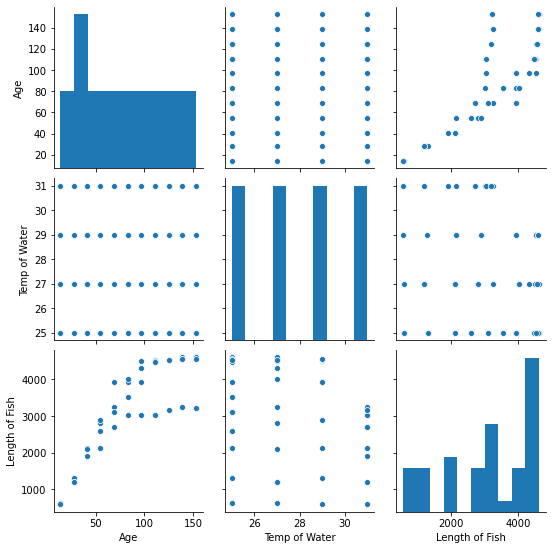

In [29]:
sb.pairplot(df) # I'm not using this for the assignment, this is just to get a feel for the data
# X_train = train_df['Age']
# X_test = test_df['Age']
# Y_train = train_df['Length of Fish']
# Y_test = test_df['Length of Fish']


# plt.scatter(X_train, Y_train, color='black')
# plt.title('Train Data')
# plt.xlabel('Age')
# plt.ylabel('Length of Fish')
# # plt.xticks(())
# # plt.yticks(())
# plt.show()

# plt.scatter(X_test, Y_test, color='black')
# plt.title('Test Data')
# plt.xlabel('Age')
# plt.ylabel('Length of Fish')
# # plt.xticks(())
# # plt.yticks(())
# plt.show()

In [11]:
#2 Randomizes the data
df = df.sample(frac=1)

In [12]:
#3 Selects the first 2/3 (round up) of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

    Age  Temp of Water  Length of Fish
27   83             29            3920
20  139             27            4600
5    83             25            3535
26   69             29            3920
43  153             31            3214
28   97             29            4515
10  153             25            4600
6    97             25            3935
0    14             25             620
29  111             29            4520
39   97             31            3030
36   55             31            2140
30  125             29            4525
14   55             27            2805
1    28             25            1315
25   55             29            2890
34   28             31            1205
16   83             27            4015
42  139             31            3257
41  125             31            3180
19  125             27            4535
11   14             27             625
22   14             29             590
12   28             27            1215
32  153             29   

In [13]:
#4 Standardizes the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)
# length_mean = np.average(train_df['Length of Fish'])
# length_stddev = np.std(train_df['Length of Fish'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

84.92
47.1919131490414
28.2
2.1602468994692865


In [30]:
X_train_std = (train_df['Age'] - age_mean) / age_stddev
X_test_std = (test_df['Age'] - age_mean) / age_stddev
temp_train_std = (train_df['Temp of Water'] - temp_mean) / temp_stddev
# Y_train_std = (train_df['Length of Fish'] - length_mean) / length_stddev

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

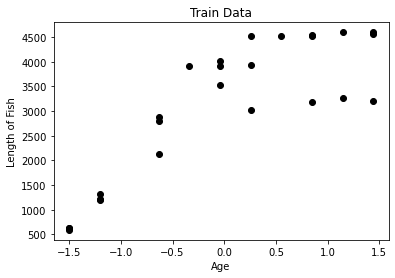

In [31]:
plt.scatter(X_train_std, Y_train, color='black')
plt.title('Train Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

In [35]:
#5 Computes the closed-form solution of linear regression
X = np.c_[np.ones(len(X_train_std)),X_train_std]
X = np.array(X)
Y = np.array(Y_train)

In [36]:
thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
thetas

array([3090.88      , 1194.84609906])

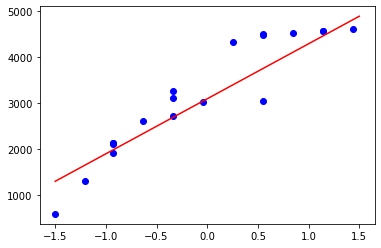

In [38]:
#6 Applies the solution to the testing samples
def y_compute(x):
    return (thetas[1]*x) + thetas[0]
x1 = -1.5
x2 = 1.5
y1 = y_compute(x1)
y2 = y_compute(x2)

plt.plot(X_test_std, Y_test, 'bo')
plt.plot([x1,x2] ,[y1,y2], color='red')
plt.show()

In [40]:
#7 Computes theroot mean squared error
error_squared_sum = 0
# test_std_df = 
for index, row in test_df[['Age', 'Length of Fish']].iterrows():
    x = X_test_std[index] # row['Age']
    y_act = row['Length of Fish']
    y_pred = y_compute(x)
    error_squared = (y_act - y_pred)**2
    error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

454.0117843502521

## 3. Locally-Weighted Linear Regression

In [41]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [42]:
#1 Read in the data, ignoring the first row (header) and first column (index
df = pd.read_csv('x06Simple.csv')
del df['Index']

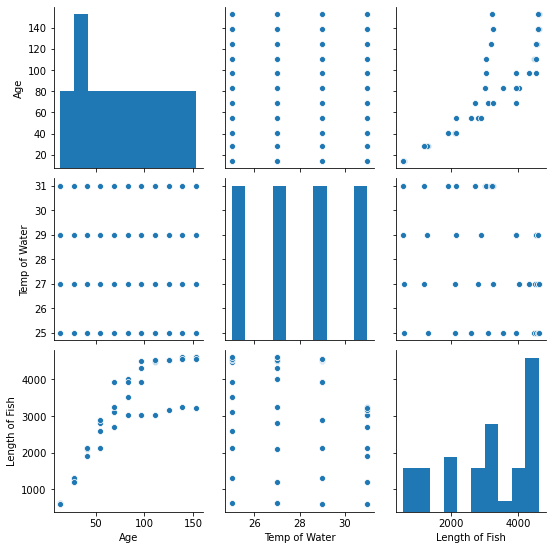

In [43]:
sb.pairplot(df)

In [44]:
#2 Randomize the data
df = df.sample(frac=1)

In [45]:
#3 Select the first 2/3 of the data for training and the remaining for testing
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

print(train_df)
print()
print(test_df)

    Age  Temp of Water  Length of Fish
14   55             27            2805
15   69             27            3255
19  125             27            4535
26   69             29            3920
36   55             31            2140
25   55             29            2890
32  153             29            4566
10  153             25            4600
27   83             29            3920
13   41             27            2110
28   97             29            4515
7   111             25            4465
39   97             31            3030
6    97             25            3935
17   97             27            4315
22   14             29             590
35   41             31            1915
18  111             27            4495
38   83             31            3020
37   69             31            2710
24   41             29            2140
1    28             25            1315
41  125             31            3180
31  139             29            4565
23   28             29   

In [46]:
#4 Standardize the data (except for the last column of course) using the training data
age_mean = np.average(train_df['Age'])
age_stddev = np.std(train_df['Age'], ddof=1)
temp_mean = np.average(train_df['Temp of Water'])
temp_stddev = np.std(train_df['Temp of Water'], ddof=1)
# length_mean = np.average(train_df['Length of Fish'])
# length_stddev = np.std(train_df['Length of Fish'], ddof=1)

print(age_mean)
print(age_stddev)
print(temp_mean)
print(temp_stddev)

79.51612903225806
38.72455807171287
27.774193548387096
2.2317359076042855


In [47]:
X_train_std = (train_df['Age'] - age_mean) / age_stddev
X_test_std = (test_df['Age'] - age_mean) / age_stddev
temp_train_std = (train_df['Temp of Water'] - temp_mean) / temp_stddev
# Y_train_std = (train_df['Length of Fish'] - length_mean) / length_stddev

Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']

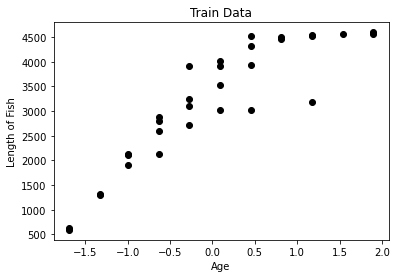

In [48]:
plt.scatter(X_train_std, Y_train, color='black')
plt.title('Train Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

In [49]:
#5

In [ ]:
#a) Compute the necessary distance matrices relative to the training data in order to computea local model.


In [ ]:
def B(a,b,k):
    return e**(-d(a,b)/k**2)